#### Raphael Mbelli
#### Evaluating Machine Learning Regression Models

###### PROBLEM OVERVIEW

This project involves fitting regression models to data from the Boston Housing Study with the objective to assess the market value of residential real estate. The response variable is the "median value" of homes in the census track. 

Variable Names:
neighborhood = Name of the Boston neighborhood (location of the census tract)
mv           = Median value of homes in thousands of 1970 dollars
nox          = Air pollution (nitrogen oxide concentration)
crim         = Crime rate
zn           = Percent of land zoned for lots
indus        = Percent of business that is industrial or nonretail
chas         = On the Charles River (1) or not (0)
rooms        = Average number of rooms per home
age          = Percentage of homes built before 1940
dis          = Weighted distance to employment centers
rad          = Accessibility to radial highways
tax          = Tax rate
ptratio      = Pupil/teacher ratio in public schools
lstat        = Percentage of population of lower socio-economic status

Regression modeling methods used were: 
- linear regression
- ridge regression
- lasso regression
- elastic net
- RandomForest
- Gradient Boosting

The models were evaluated using root mean-squared error (RMSE) as an index of prediction error. 

###### Setup Environment
- Load Packages
- Setup for seaborn package
- Setup parameters for plots
- Import data into environment

In [1]:
# Import base packages into the namespace for this program & # modeling routines from Scikit Learn packages

%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt  # static plotting
import numpy as np               # arrays and math functions
import os
import pandas as pd              # data frame operations 
import pylab as pl
import seaborn as sns            # pretty plotting, including heat map
import sklearn
import sklearn.linear_model
from math import sqrt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Decision Trees
# from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from IPython.display import Image
# from sklearn.cross_validation import ShuffleSplit

from decimal import Decimal

In [2]:
# Read in .csv file, creating a pandas DataFrame object
boston_init = pd.read_csv('boston.csv')
prices = boston_init['mv']

###### DESCRIPTION OF THE DATA SET

There are 14 features in the boston housing dataset. Of the 14, "mv" is the response variable and the remaining 13 are the target variables. One of the features, "neighborhood" is a categorical variable with 93 unique values and cambridge having the highest frequency. No further analysis needed for the neighborhood as it has to be dropped from the dataframe.
Note: Though the neighborhood feature is being dropped and not being used in the analysis, it's still good practice to at least understand some basic information about the feature before dropping or creating a new dataframe without it.

In [3]:
# Examine first 5 rows of the dataframe

boston_init.head(5)

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
# Check for missing values
boston_init.isnull().sum()

neighborhood    0
crim            0
zn              0
indus           0
chas            0
nox             0
rooms           0
age             0
dis             0
rad             0
tax             0
ptratio         0
lstat           0
mv              0
dtype: int64

In [5]:
# Generate descriptive statistics summarizing the central tendency, dispersion and shape of the neighborhood feature.
boston_init['neighborhood'].describe()

count           506
unique           93
top       Cambridge
freq             30
Name: neighborhood, dtype: object

In [6]:
# Display unique neighborhoods
boston_init['neighborhood'].unique()

array(['Nahant', 'Swampscott', 'Swanpscott', 'Marblehead', 'Salem',
       'Lynn', 'Saugus', 'Lynnfield', 'Peabody', 'Danvers', 'Middleton',
       'Topsfield', 'Hamilton', 'Wenham', 'Beverly', 'Manchester',
       'North_Reading', 'Wilmington', 'Burlington', 'Woburn', 'Reading',
       'Wakefield', 'Melrose', 'Stoneham', 'Winchester', 'Medford',
       'Malden', 'Everett', 'Somerville', 'Cambridge', 'Arlington',
       'Belmont', 'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury',
       'Wayland', 'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick',
       'Framingham', 'Ashland', 'Sherborn', 'Brookline', 'Dedham',
       'Needham', 'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk',
       'Walpole', 'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton',
       'Quincy', 'Braintree', 'Randolph', 'Holbrook', 'Weymouth',
       'Cohasset', 'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell',
       'Scituate', 'Marshfield', 'Duxbury', 'Pembroke',
       'Allston-Brighton', 'Bac

In [7]:
# Examine the top 5 & bottom 5 neighborhoods by the response variable "mv"

top_5 = boston_init[['mv','neighborhood']]
top_5 = top_5.groupby('neighborhood').mean()
top_5 = top_5.sort_values('mv', ascending = False)
print('\nTop 5 Neighborhoods:\n= = = = = = = = = = = = =')
print(top_5.head(5))
print('\nBottom 5 Neighborhoods:\n= = = = = = = = = = = = =')
print(top_5.tail(5))
# print('\nTop 5 Neighborhoods:\n= = = = = = = = = = = = =', top_5.head(5))
# print('\nBottom 5 Neighborhoods:\n= = = = = = = = = = = = =', top_5.tail(5))


Top 5 Neighborhoods:
= = = = = = = = = = = = =
                 mv
neighborhood       
Lincoln       50.00
Beacon_Hill   50.00
Dover         50.00
Weston        49.25
Sherborn      44.00

Bottom 5 Neighborhoods:
= = = = = = = = = = = = =
                     mv
neighborhood           
Chelsea       12.800000
Charlestown   12.400000
Roxbury       11.615789
East_Boston   11.563636
South_Boston   9.123077


In [8]:
# Drop the neighborhood feature from the boston_init dataframe.
# Verify the neighborhood feature was dropped
boston = boston_init.drop(['neighborhood'], axis=1)
boston.head(5)

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [9]:
# Generate descriptive statistics summarizing the central tendency, dispersion and shape of a dataset’s distribution
boston.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
# Calculating statistics of the feature "mv"

# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

print("Statistics for Boston Housing Dataset:")
print("--------------------------------------------------")
print("Minimum price:                ${}".format(minimum_price)) 
print("Maximum price:                ${}".format(maximum_price))
print("Mean price:                   ${}".format(mean_price))
print("Median price                  ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston Housing Dataset:
--------------------------------------------------
Minimum price:                $5.0
Maximum price:                $50.0
Mean price:                   $22.528853754940737
Median price                  $21.2
Standard deviation of prices: $9.17309809855143


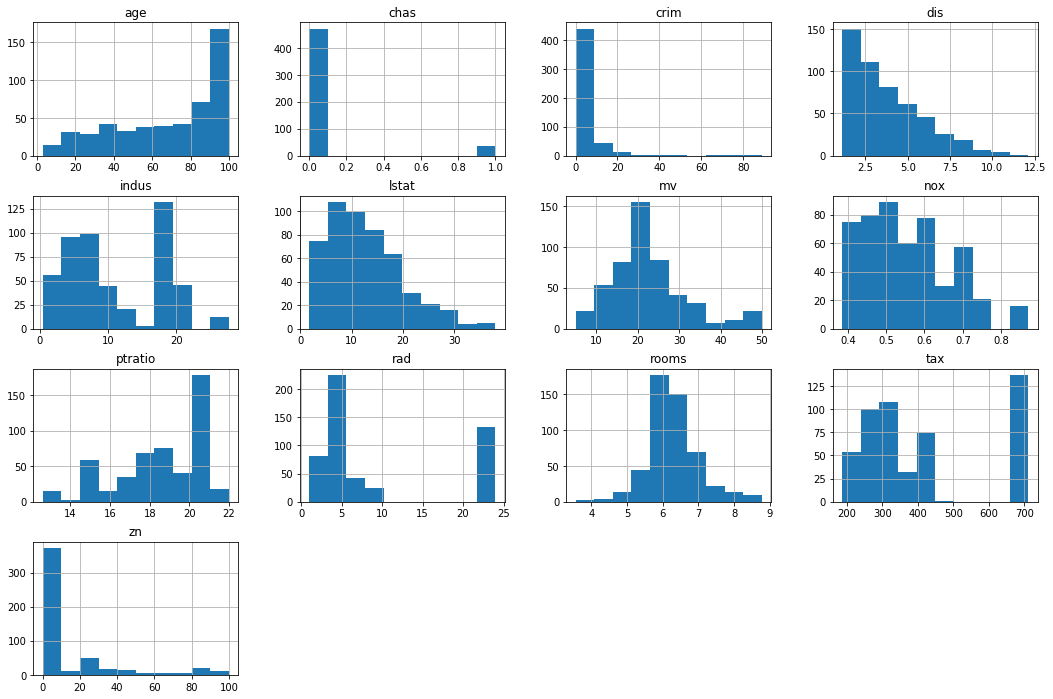

In [11]:
# Check distributions of non-categorical variables for boston housing dataset using by histogram
boston.hist(figsize=(18,12))
plt.show('plot-histogram-boston')

In [12]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

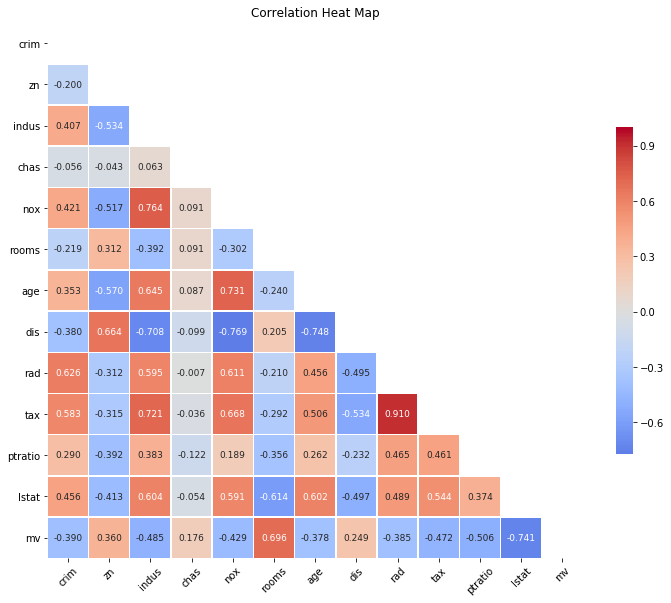

In [13]:
# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(df_corr = boston) 

In [14]:
# Initializing the X and Y variables
import math
X = boston[['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']]
y = boston['mv']
feature_cols = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']

# Splitting the boston dataframe into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=1337)
# print(X_train.head(5))
# print(y.head(5))

# Log transformation of target variable
y_log = np.log(boston['mv'])
# print(y_log.head(5))

# Splitting the boston dataframe into train and test sets accounting for the log transformation of the Target Variable
X_train, X_test, y_log_train, y_log_test = model_selection.train_test_split(X, y_log, test_size=0.33, random_state=1337)
# print(X_train.head(5))

In [15]:
# Normalizing the data set using the MinMaxScaler transformation 

scaler = preprocessing.MinMaxScaler()
# scaler.fit(X_train)
# X_train_norm = scaler.transform(X_train)
X_train_norm = scaler.fit_transform(X_train)   # This line is a combination of the 2 lines above
X_test_norm = scaler.transform(X_test)
# X_norm = scaler.fit_transform(X)

pd.DataFrame(data=X_train_norm, columns=X_train.columns).describe()

/Users/raphael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.039520,0.105354,0.399063,0.073746,0.357143,0.531510,0.666497,0.272184,0.368988,0.421434,0.613946,0.327926
std,0.091874,0.222944,0.255219,0.261744,0.242499,0.135374,0.300365,0.219674,0.373885,0.321101,0.234487,0.211553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000890,0.000000,0.173387,0.000000,0.150206,0.453918,0.398188,0.098773,0.130435,0.176864,0.468085,0.151483
50%,0.003071,0.000000,0.338343,0.000000,0.314815,0.518763,0.766525,0.204537,0.173913,0.271511,0.680851,0.292070
75%,0.039851,0.125000,0.646628,0.000000,0.491770,0.595081,0.940299,0.418971,1.000000,0.913958,0.808511,0.460654
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# MinMaxScaler to normalize the entire dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_norm = scaler.transform(X)

pd.DataFrame(data=X_norm, columns=X.columns).describe()

/Users/raphael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.529581,0.664978,0.278472,0.371713,0.421104,0.622929,0.330601
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.136616,0.300094,0.223738,0.378576,0.322251,0.230313,0.216134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.035181,-0.004739,0.000000,-0.001912,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.451974,0.413913,0.098388,0.130435,0.173996,0.510638,0.157990
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.514777,0.760128,0.216039,0.173913,0.271511,0.686170,0.291465
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.595470,0.936834,0.426523,1.000000,0.913958,0.808511,0.460805
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.014777,1.000000,1.163715,1.000000,1.000000,1.000000,1.096852


###### Normalizing all Features to the same Magnitude Using MinMaxScaler
From the output of the MinMaxScaler above, the mean represents the interest level.
It should be noted that most of the times, features in datasets vary highly in magnitudes, units and range. Given that most of the machine learning algorithms use the Eucledian distance between two datapoints in their computation, the varying magnitudes, units and range of the features pose a problem where by the ML algorithms would take into account only the magnitudes ignoring the units. As a result, features with high magnitudes would weigh alot more in the Eucladian distance calculations than those with low magnitudes.
As a mitigation step, all the features were normalized to the same magnitude level using the MinMaxScaler in SciKit package.

In [34]:
###### MODEL 1: Linear Regression 

In [165]:
# LinearRegression()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_lr = lr.predict(X_train_norm)
y_pred_test_lr = lr.predict(X_test_norm)
y_pred_all_lr = lr.predict(X_norm)

# Construct a vector of errors for train and test data sets
lr_err_train = abs(y_pred_train_lr - y_train)
lr_err_test = abs(y_pred_test_lr - y_test)
lr_err_all = abs(y_pred_all_lr - y)

# Compute MSE for Train set, Test set and Entire set
mse_lr_train = mean_squared_error(y_train, y_pred_train_lr)
mse_lr_test = mean_squared_error(y_test, y_pred_test_lr)
mse_lr_all = mean_squared_error(y, y_pred_all_lr)

# Compute RMSE for Train set, Test set and Entire set
rmse_lr_train = sqrt(abs(mse_lr_train))
rmse_lr_test = sqrt(abs(mse_lr_test))
rmse_lr_all = sqrt(abs(mse_lr_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_lr_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_lr_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_lr_all)
print("RMSE - Lin Reg - train:    %.4f" % rmse_lr_train)
print("RMSE - Lin Reg - test:     %.4f" % rmse_lr_test)
print("RMSE - Lin Reg - all :     %.4f" % rmse_lr_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
lr_kf = LinearRegression()
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(lr_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(lr_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(lr_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_lr_train = lr_ridge.score(X_train_norm, y_train)
acc_lr_test  = lr_ridge.score(X_test_norm, y_test)
acc_lr_all   = lr_ridge.score(X_norm, y)

# Print Accuracy
print('\nACCURACY / RMSE')
print('Accuracy: Lin Reg - train:   ', round(100 * acc_lr_train, 2), '%.')
print('Accuracy: Lin Reg - test:    ', round(100 * acc_lr_test, 2), '%.')
print('Accuracy: Lin Reg - all:     ', round(100 * acc_lr_all, 2), '%.')

print("\nRMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)

RMSE - Lin Reg - train:    4.2155
RMSE - Lin Reg - test:     5.7638
RMSE - Lin Reg - all :     4.7822

ACCURACY / RMSE
Accuracy: Lin Reg - train:    77.88 %.
Accuracy: Lin Reg - test:     63.86 %.
Accuracy: Lin Reg - all:      72.83 %.

RMSE - 10cv - train:          4.4929
RMSE - 10cv - test:           5.9328
RMSE - 10cv - all:            5.7967


###### MODEL 2: RIDGE REGRESSION

In [89]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import Ridge
lr_ridge = Ridge()
parameters = {'alpha': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 3, 5, 7, 10, 15, 20]}
ridge_regressor = GridSearchCV(lr_ridge, parameters, scoring='neg_mean_squared_error', cv=5, iid=True)
ridge_regressor.fit(X_train_norm, y_train)

print("\nGridSearch: Optimal alpha value:   ",ridge_regressor.best_estimator_.alpha)
print("GridSearch: Best MSE:               %.4f" % ridge_regressor.best_score_)


GridSearch: Optimal alpha value:    0.01
GridSearch: Best MSE:               -20.8115


In [90]:
# Compared the alpha values obtained from the RandomizedSearcv to that obtained from GridSearch

# import numpy as np 
# import pandas as pd 
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import Ridge
from scipy.stats import uniform
import os
# print(os.listdir("../input"))
# data = pd.read_csv("../input/pima_data.csv")
# array = data.values
# X = array[:,0:8]
# Y = array[:,8]
seed = 2
model = Ridge()
param_grid = {'alpha':uniform()}
grid = RandomizedSearchCV(model,param_distributions=param_grid, cv=5)
grid.fit(X_train_norm,y_train)
print("RandomizedSearch: Best alpha:    ",grid.best_estimator_.alpha)
print("RandomizedSearch: Best score:    ",grid.best_score_)

RandomizedSearch: Best alpha:     0.42449366303157665
RandomizedSearch: Best score:     0.7251200647096094


###### OPTIMAL ALPHA = 0.01
From the GridSearch, the alpha value that had the best performance is 0.01.

In the Ridge Regression model below, the alpha value was set to 0.01 

In [152]:
# Ridge Regression

seed = 7
lr_ridge = Ridge(alpha=0.01)
lr_ridge.fit(X_train_norm, y_train)
lr_ridge.score(X_train_norm, y_train)

# Predicting y for Train set, Test set and Entire set
y_pred_ridge_train = lr_ridge.predict(X_train_norm)
y_pred_ridge_test  = lr_ridge.predict(X_test_norm)
y_pred_ridge_all   = lr_ridge.predict(X_norm)

# Computing Error for Train set, Test set and Entire set
err_ridge_train = abs(y_pred_ridge_train - y_train)
err_ridge_test  = abs(y_pred_ridge_test - y_test)
err_ridge_all   = abs(y_pred_ridge_all - y)

# Dot product of error vector with itself gives us the sum of squared errors
total_err_ridge_train = np.dot(err_ridge_train,err_ridge_train)
total_err_ridge_test  = np.dot(err_ridge_test,err_ridge_test)
total_err_ridge_all   = np.dot(err_ridge_all,err_ridge_all)

# Compute MSE for Train set, Test set and Entire set
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_ridge_test  = mean_squared_error(y_test, y_pred_ridge_test)
mse_ridge_all   = mean_squared_error(y, y_pred_ridge_all)

rmse_ridge_train = sqrt(abs(mse_ridge_train))
rmse_ridge_test = sqrt(abs(mse_ridge_test))
rmse_ridge_all = sqrt(abs(mse_ridge_all))

# # Compute metrics with formulas from the theory
# lr_ridge_Residual = sum((y - y_pred_ridge)**2)
# lr_ridge_Total = sum((y - np.mean(y))**2)
# r_sq_ridge = 1 - (float(lr_ridge_Residual))/lr_ridge_Total
# adj_r_sq_ridge = 1 - (1-r_sq_ridge)*(len(y_test)-1)/(len(y_test)-X_test_norm.shape[1]-1)

# Pretty printing of coefficients 
# feature_cols_List = np.array(list(feature_cols)).reshape(-1,1)
# coeffs_ridge = np.reshape(np.round(lr_ridge.coef_,5),(-1,1))
# coeffs_ridge = np.concatenate((feature_cols_List,coeffs_ridge),axis=1)

# print(pd.DataFrame(coeffs_ridge,columns=['Field','Coeff']))

# Compute Accuracy
acc_ridge_train = lr_ridge.score(X_train_norm, y_train)
acc_ridge_test  = lr_ridge.score(X_test_norm, y_test)
acc_ridge_all   = lr_ridge.score(X_norm, y)

# Print Accuracy
print('\nACCURACY / RMSE')
print('Accuracy: ridge - train:           ', round(100 * acc_ridge_train, 2), '%.')
print('Accuracy: ridge - test:            ', round(100 * acc_ridge_test, 2), '%.')
print('Accuracy: ridge - all:             ', round(100 * acc_ridge_all, 2), '%.')

print('\nIntercept:                         %.4f' % lr_ridge.intercept_)

print('RMSE: Ridge Regression - Train     %.4f' % sqrt(abs(mse_ridge_train)))
print('RMSE: Ridge Regression - Test      %.4f' % sqrt(abs(mse_ridge_test)))
print('RMSE: Ridge Regression - All       %.4f' % sqrt(abs(mse_ridge_all)))


ACCURACY / RMSE
Accuracy: ridge - train:            77.88 %.
Accuracy: ridge - test:             63.86 %.
Accuracy: ridge - all:              72.83 %.

Intercept:                         25.5483
RMSE: Ridge Regression - Train     4.2155
RMSE: Ridge Regression - Test      5.7629
RMSE: Ridge Regression - All       4.7819


In [92]:
###### MODEL 3: LASSO REGRESSION

In [93]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import Ridge
lr_lasso = Lasso()
parameters = {'alpha': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 3, 5, 7, 10, 15, 20]}
lasso_regressor = GridSearchCV(lr_lasso, parameters, scoring='neg_mean_squared_error', cv=5, iid=True)
lasso_regressor.fit(X_train_norm, y_train)

print("\nOptimal alpha value:   ",lasso_regressor.best_estimator_.alpha)
print("Best MSE:               %.4f" % lasso_regressor.best_score_)


Optimal alpha value:    1e-10
Best MSE:               -20.8151


In [167]:
# MODEL 3: Lasso Regression
# Based on results of the best alpha value above, "alpha=1e-10"

seed = 7
lr_lasso = linear_model.Lasso(alpha=1e-10)
lr_lasso.fit(X_train_norm, y_train)
lr_lasso.score(X_train_norm, y_train)

# Predicting y for Train set, Test set and Entire set
y_pred_lasso_train = lr_lasso.predict(X_train_norm)
y_pred_lasso_test = lr_lasso.predict(X_test_norm)
y_pred_lasso_all = lr_lasso.predict(X_norm)

# Computing Error for Train set, Test set and Entire set
err_lasso_train = abs(y_pred_lasso_train - y_train)
err_lasso_test = abs(y_pred_lasso_test - y_test)
err_lasso_all = abs(y_pred_lasso_all - y)

# Dot product of error vector with itself gives us the sum of squared errors
total_err_lasso_train = np.dot(err_lasso_train,err_lasso_train)
total_err_lasso_test = np.dot(err_lasso_test,err_lasso_test)
total_err_lasso_all = np.dot(err_lasso_all,err_lasso_all)

# Compute MSE for Train set, Test set and Entire set
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
mse_lasso_all = mean_squared_error(y, y_pred_lasso_all)

# Compute RMSE for Train set, Test set and Entire set
rmse_lasso_train = sqrt(abs(mse_lasso_train))
rmse_lasso_test = sqrt(abs(mse_lasso_test))
rmse_lasso_all = sqrt(abs(mse_lasso_all))

# Compute Accuracy
acc_lasso_train = lr_lasso.score(X_train_norm, y_train)
acc_lasso_test  = lr_lasso.score(X_test_norm, y_test)
acc_lasso_all   = lr_lasso.score(X_norm, y)

# Print Accuracy
print('\nACCURACY / RMSE')
print('Accuracy: lasso - train:             ', round(100 * acc_lasso_train, 2), '%.')
print('Accuracy: lasso - test:              ', round(100 * acc_lasso_test, 2), '%.')
print('Accuracy: lasso - all:               ', round(100 * acc_lasso_all, 2), '%.')

print('\nIntercept:                         %.4f' % lr_ridge.intercept_)
print('RMSE: Lasso Regression - Train     %.4f' % sqrt(abs(mse_lasso_train)))
print('RMSE: Lasso Regression - Test      %.4f' % sqrt(abs(mse_lasso_test)))
print('RMSE: Lasso Regression - All       %.4f' % sqrt(abs(mse_lasso_all)))


ACCURACY / RMSE
Accuracy: lasso - train:              77.88 %.
Accuracy: lasso - test:               63.85 %.
Accuracy: lasso - all:                72.82 %.

Intercept:                         25.5483
RMSE: Lasso Regression - Train     4.2155
RMSE: Lasso Regression - Test      5.7638
RMSE: Lasso Regression - All       4.7822


###### MODEL 4: ELASTICNET REGRESSION

In [95]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import Ridge
lr_en = ElasticNet(random_state=0)
parameters = {'alpha': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 3, 5, 7, 10, 15, 20]}
en_regressor = GridSearchCV(lr_en, parameters, scoring='neg_mean_squared_error', cv=5, iid=True)
en_regressor.fit(X_train_norm, y_train)

print("\nOptimal alpha value:   ",en_regressor.best_estimator_.alpha)
print("Best MSE:               %.4f" % en_regressor.best_score_)


Optimal alpha value:    0.001
Best MSE:               -20.8007


In [144]:
# MODEL 4: Elastic Net Regression
# Based on results of the best alpha value above, "alpha=0.001"

seed = 7
lr_en = ElasticNet(alpha=0.001, random_state=0)
lr_en.fit(X_train_norm, y_train)
lr_en.score(X_train_norm, y_train)

# Predicting y for Train set, Test set and Entire set
y_pred_en_train = lr_en.predict(X_train_norm)
y_pred_en_test = lr_en.predict(X_test_norm)
y_pred_en_all = lr_en.predict(X_norm)

# Computing Error for Train set, Test set and Entire set
err_en_train = abs(y_pred_en_train - y_train)
err_en_test = abs(y_pred_en_test - y_test)
err_en_all = abs(y_pred_en_all - y)

# Dot product of error vector with itself gives us the sum of squared errors
total_err_en_train = np.dot(err_en_train,err_en_train)
total_err_en_test = np.dot(err_en_test,err_en_test)
total_err_en_all = np.dot(err_en_all,err_en_all)

# Compute MSE for Train set, Test set and Entire set
mse_en_train = mean_squared_error(y_train, y_pred_en_train)
mse_en_test  = mean_squared_error(y_test, y_pred_en_test)
mse_en_all   = mean_squared_error(y, y_pred_en_all)

# Compute RMSE for Train set, Test set and Entire set
rmse_en_train = sqrt(abs(mse_en_train))
rmse_en_test  = sqrt(abs(mse_en_test))
rmse_en_all   = sqrt(abs(mse_en_all))

# Compute Accuracy
acc_en_train = lr_en.score(X_train_norm, y_train)
acc_en_test  = lr_en.score(X_test_norm, y_test)
acc_en_all   = lr_en.score(X_norm, y)

# Print Accuracy
print('\nACCURACY / RMSE')
print('Accuracy: en - train:                    ', round(100 * acc_en_train, 2), '%.')
print('Accuracy: en - test:                     ', round(100 * acc_en_test, 2), '%.')
print('Accuracy: en - all:                      ', round(100 * acc_en_all, 2), '%.')

print('\nIntercept:                               %.4f' % lr_ridge.intercept_)
print('RMSE: ElasticNet Regression - Train      %.4f' % sqrt(abs(mse_en_train)))
print('RMSE: ElasticNet Regression - Test       %.4f' % sqrt(abs(mse_en_test)))
print('RMSE: ElasticNet Regression - All        %.4f' % sqrt(abs(mse_en_all)))


ACCURACY / RMSE
Accuracy: en - train:      77.85 %.
Accuracy: en - test:       63.98 %.
Accuracy: en - all:        72.85 %.

Intercept:                                   25.5483
RMSE: ElasticNet Regression - Train          4.2182
RMSE: ElasticNet Regression - Test           5.7533
RMSE: ElasticNet Regression - All            4.7797


###### MODEL 5: RANDOM FOREST

Building upon Assignment 3, adding RandomForest model for evaluation.

In [143]:
# Model 5: Random Forest

rf_m1 = RandomForestRegressor(n_estimators=5)

# Train Model
rf_m1.fit(X_train_norm, y_train);

# rf_m1 Predictions
y_pred_rf_m1_train = rf_m1.predict(X_train_norm)
y_pred_rf_m1_test  = rf_m1.predict(X_test_norm)
y_pred_rf_m1_all   = rf_m1.predict(X_norm)

# Compute absolute errors
err_rf_m1_train = abs(y_pred_rf_m1_train - y_train)
err_rf_m1_test  = abs(y_pred_rf_m1_test - y_test)
err_rf_m1_all   = abs(y_pred_rf_m1_all - y)

# Compute Accuracy
acc_rf_m1_train = rf_m1.score(X_train_norm, y_train)
acc_rf_m1_test  = rf_m1.score(X_test_norm, y_test)
acc_rf_m1_all   = rf_m1.score(X_norm, y)

# Compute MSE
mse_rf_m1_train = mean_squared_error(y_pred_rf_m1_train, y_train)
mse_rf_m1_test  = mean_squared_error(y_pred_rf_m1_test, y_test)
mse_rf_m1_all   = mean_squared_error(y_pred_rf_m1_all, y)

# Compute RMSE
rmse_rf_m1_train = sqrt(abs(mse_rf_m1_train))
rmse_rf_m1_test  = sqrt(abs(mse_rf_m1_test))
rmse_rf_m1_all   = sqrt(abs(mse_rf_m1_all))

# Print Accuracy
print('\nACCURACY / RMSE')
print('Accuracy: rf_m1 - train:       ', round(100 * acc_rf_m1_train, 2), '%.')
print('Accuracy: rf_m1 - test:        ', round(100 * acc_rf_m1_test, 2), '%.')
print('Accuracy: rf_m1 - all:         ', round(100 * acc_rf_m1_all, 2), '%.')

# Print RMSE
print('\nRMSE: rf_m1 - train             %.4f' % rmse_rf_m1_train)
print('RMSE: rf_m1 - test              %.4f' % rmse_rf_m1_test)
print('RMSE: rf_m1 - all               %.4f' % rmse_rf_m1_all)


ACCURACY / RMSE
Accuracy: rf_m1 - train:        96.76 %.
Accuracy: rf_m1 - test:         70.82 %.
Accuracy: rf_m1 - all:          87.41 %.

RMSE: rf_m1 - train            1.6130
RMSE: rf_m1 - test             5.1780
RMSE: rf_m1 - all              3.2545


In [106]:
# List of weight of the variables
# dec_tree.feature_importances_   rooms and lstat
# Average number of rooms per home knowig no of rooms accounted for 39% of models ability to determine value of house
# lstat = Percentage of population of lower socio-economic status 42 is explained by
# when classification problem ... gini and regression = RMSE
# pd.DataFrame(data=rf_m1.feature_importances_, columns=X_train.columns)

feature_cols_List = np.array(list(feature_cols)).reshape(-1,1)
for name, val in zip(feature_cols_List, rf_m1.feature_importances_):
	print("{}\t     {}".format(round(val,4), name))

0.0236	     ['crim']
0.0004	     ['zn']
0.0037	     ['indus']
0.0007	     ['chas']
0.0281	     ['nox']
0.7131	     ['rooms']
0.0199	     ['age']
0.0162	     ['dis']
0.0017	     ['rad']
0.0082	     ['tax']
0.009	     ['ptratio']
0.1754	     ['lstat']


In [128]:
# Model 6: Random Forest with max_depth = 4 and min_samples_leaf = 1

rf_m2 = RandomForestRegressor(max_depth=4, min_samples_leaf=1, n_estimators=5)

# Train Model
rf_m2.fit(X_train_norm, y_train);

# rf_m2 Predictions
y_pred_rf_m2_train = rf_m2.predict(X_train_norm)
y_pred_rf_m2_test  = rf_m2.predict(X_test_norm)
y_pred_rf_m2_all   = rf_m2.predict(X_norm)

# Compute absolute errors
err_rf_m2_train = abs(y_pred_rf_m2_train - y_train)
err_rf_m2_test  = abs(y_pred_rf_m2_test - y_test)
err_rf_m2_all   = abs(y_pred_rf_m2_all - y)

# Compute Accuracy
acc_rf_m2_train = rf_m2.score(X_train_norm, y_train)
acc_rf_m2_test  = rf_m2.score(X_test_norm, y_test)
acc_rf_m2_all   = rf_m2.score(X_norm, y)

# Compute MSE
mse_rf_m2_train = mean_squared_error(y_pred_rf_m2_train, y_train)
mse_rf_m2_test  = mean_squared_error(y_pred_rf_m2_test, y_test)
mse_rf_m2_all   = mean_squared_error(y_pred_rf_m2_all, y)

# Compute RMSE
rmse_rf_m2_train = sqrt(abs(mse_rf_m2_train))
rmse_rf_m2_test  = sqrt(abs(mse_rf_m2_test))
rmse_rf_m2_all   = sqrt(abs(mse_rf_m2_all))

# Print Accuracy
print('\nACCURACY / RMSE')
print('Accuracy: rf_m2 - train:  ', round(100 * acc_rf_m2_train, 2), '%.')
print('Accuracy: rf_m2 - test:     ', round(100 * acc_rf_m2_test, 2), '%.')
print('Accuracy: rf_m2 - all:      ', round(100 * acc_rf_m2_all, 2), '%.')

# Print RMSE
print('\nRMSE: rf_m2 - train         %.4f' % rmse_rf_m2_train)
print('RMSE: rf_m2 - test          %.4f' % rmse_rf_m2_test)
print('RMSE: rf_m2 - all           %.4f' % rmse_rf_m2_all)


ACCURACY / RMSE

Accuracy: rf_m2 - train: 91.82 %.
Accuracy: rf_m2 - test:  67.53 %.
Accuracy: rf_m2 - all:   83.07 %.

RMSE: rf_m2 - train   2.5634
RMSE: rf_m2 - test    5.4619
RMSE: rf_m2 - all     3.7747


In [108]:
feature_cols_List = np.array(list(feature_cols)).reshape(-1,1)
for name, val in zip(feature_cols_List, rf_m2.feature_importances_):
	print("{}\t     {}".format(round(val,4), name))

0.0626	     ['crim']
0.0	     ['zn']
0.0005	     ['indus']
0.0007	     ['chas']
0.0047	     ['nox']
0.5982	     ['rooms']
0.0078	     ['age']
0.0263	     ['dis']
0.0009	     ['rad']
0.0061	     ['tax']
0.0023	     ['ptratio']
0.2898	     ['lstat']


In [109]:
# GradientBoostingRegressor

gbr_m1 = GradientBoostingRegressor(n_estimators=100)
gbr_m1.fit(X_train_norm, y_train)
y_pred = gbr_m1.predict(X_test)

# gbr_m1 Predictions
y_pred_gbr_m1_train = gbr_m1.predict(X_train_norm)
y_pred_gbr_m1_test  = gbr_m1.predict(X_test_norm)
y_pred_gbr_m1_all   = gbr_m1.predict(X_norm)

# Compute absolute errors
err_gbr_m1_train = abs(y_pred_gbr_m1_train - y_train)
err_gbr_m1_test  = abs(y_pred_gbr_m1_test - y_test)
err_gbr_m1_all   = abs(y_pred_gbr_m1_all - y)

# Compute Accuracy
acc_gbr_m1_train = gbr_m1.score(X_train_norm, y_train)
acc_gbr_m1_test  = gbr_m1.score(X_test_norm, y_test)
acc_gbr_m1_all   = gbr_m1.score(X_norm, y)

# Compute MSE
mse_gbr_m1_train = mean_squared_error(y_pred_gbr_m1_train, y_train)
mse_gbr_m1_test  = mean_squared_error(y_pred_gbr_m1_test, y_test)
mse_gbr_m1_all   = mean_squared_error(y_pred_gbr_m1_all, y)

# Compute RMSE
rmse_gbr_m1_train = sqrt(abs(mse_gbr_m1_train))
rmse_gbr_m1_test  = sqrt(abs(mse_gbr_m1_test))
rmse_gbr_m1_all   = sqrt(abs(mse_gbr_m1_all))

# Print Accuracy
print('Accuracy: gbr_m1 - train:', round(100 * acc_gbr_m1_train, 2), '%.')
print('Accuracy: gbr_m1 - test: ', round(100 * acc_gbr_m1_test, 2), '%.')
print('Accuracy: gbr_m1 - all:  ', round(100 * acc_gbr_m1_all, 2), '%.')

# Print RMSE
print('\nRMSE: gbr_m1 - train       %.4f' % rmse_gbr_m1_train)
print('RMSE: gbr_m1 - test        %.4f' % rmse_gbr_m1_test)
print('RMSE: gbr_m1 - all         %.4f' % rmse_gbr_m1_all)

Accuracy: gbr_m1 - train: 97.87 %.
Accuracy: gbr_m1 - test:  75.3 %.
Accuracy: gbr_m1 - all:   89.74 %.

RMSE: gbr_m1 - train       1.3070
RMSE: gbr_m1 - test        4.7640
RMSE: gbr_m1 - all         2.9385


In [110]:
# DECISION TREE

dt_m1 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1,random_state=0)
dt_m1.fit(X_train_norm, y_train)

# dt_m1 Predictions
y_pred_dt_m1_train = dt_m1.predict(X_train_norm)
y_pred_dt_m1_test  = dt_m1.predict(X_test_norm)
y_pred_dt_m1_all   = dt_m1.predict(X_norm)

# Compute absolute errors
err_dt_m1_train = abs(y_pred_dt_m1_train - y_train)
err_dt_m1_test  = abs(y_pred_dt_m1_test - y_test)
err_dt_m1_all   = abs(y_pred_dt_m1_all - y)

# Compute Accuracy
acc_dt_m1_train = dt_m1.score(X_train_norm, y_train)
acc_dt_m1_test  = dt_m1.score(X_test_norm, y_test)
acc_dt_m1_all   = dt_m1.score(X_norm, y)

# Compute MSE
mse_dt_m1_train = mean_squared_error(y_pred_dt_m1_train, y_train)
mse_dt_m1_test  = mean_squared_error(y_pred_dt_m1_test, y_test)
mse_dt_m1_all   = mean_squared_error(y_pred_dt_m1_all, y)

# Compute RMSE
rmse_dt_m1_train = sqrt(abs(mse_dt_m1_train))
rmse_dt_m1_test  = sqrt(abs(mse_dt_m1_test))
rmse_dt_m1_all   = sqrt(abs(mse_dt_m1_all))

# Print Accuracy
print('Accuracy: dt_m1 - train:', round(acc_dt_m1_train, 2), '%.')
print('Accuracy: dt_m1 - test: ', round(acc_dt_m1_test, 2), '%.')
print('Accuracy: dt_m1 - all:  ', round(acc_dt_m1_all, 2), '%.')

# Print RMSE
print('\nRMSE: dt_m1 - train   %.4f' % rmse_dt_m1_train)
print('RMSE: dt_m1 - test    %.4f' % rmse_dt_m1_test)
print('RMSE: dt_m1 - all     %.4f' % rmse_dt_m1_all)

Accuracy: dt_m1 - train: 88.77 %.
Accuracy: dt_m1 - test:  82.35 %.
Accuracy: dt_m1 - all:   86.65 %.

RMSE: dt_m1 - train   2.7606
RMSE: dt_m1 - test    6.5032
RMSE: dt_m1 - all     4.3662


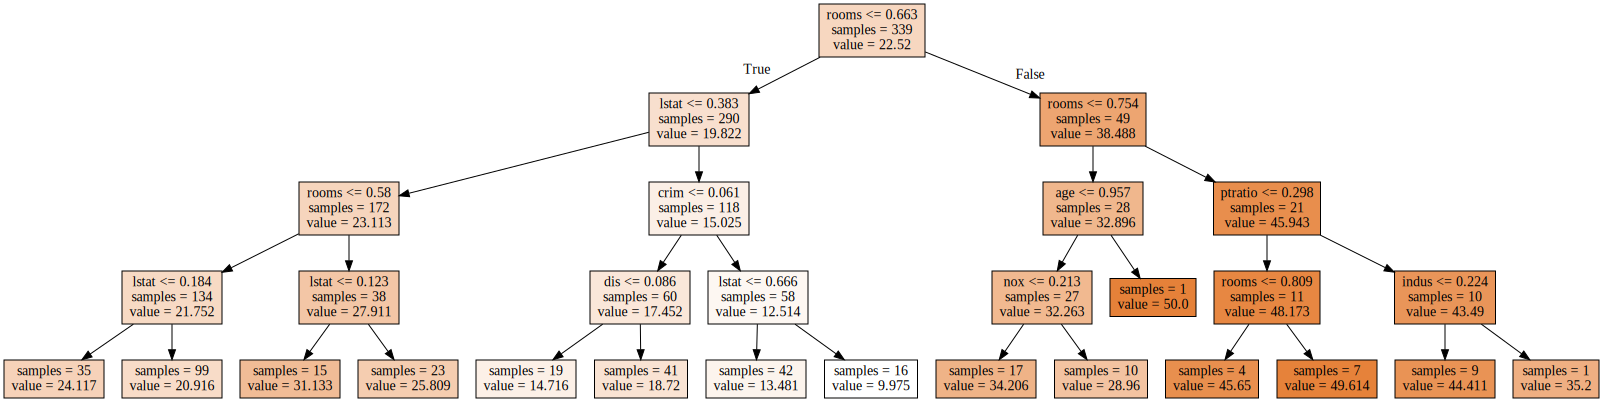

In [125]:
# Visialize a decision tree for the model "dt_m1"

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_m1, out_file="dec_tree.dot", class_names=["malignant", "benign"],
                feature_names=X.columns.values, impurity=False, filled=True)

with open("dec_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [118]:
# REPORT SUMMARY

M1_lr    = 'Model-1: Linear Regression'
M1_10cv  = 'Model-1: kfold - 10cv'
M2_ridge = 'Model-2: Ridge Regression'
M3_lasso = 'Model-3: Lasso Regression'
M4_en    = 'Model-4: ElasticNet Regression'
M5_rf_m1 = 'Model-5: RandomForestRegressor'
M6_rf_m2 = 'Model-6: RandomForestRegressor'
M7_gbr   = 'Model-7: GradientBoostingRegressor'
M8_dt_m1 = 'Model-8: DecisionTreeRegressor'

print('{}\t\t\t\t\t {}\t {}\t {}'.format('MODEL','TRAIN SET','TEST SET','ENTIRE SET'))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M1_lr,rmse_lr_train,rmse_lr_test,rmse_lr_all))
print('{}\t\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M1_10cv,rmse_kf_train,rmse_kf_test,rmse_kf_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M2_ridge,rmse_ridge_train,rmse_ridge_test,rmse_ridge_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M3_lasso,rmse_lasso_train,rmse_lasso_test,rmse_lasso_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M4_en,rmse_en_train,rmse_en_test,rmse_en_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M5_rf_m1,rmse_rf_m1_train,rmse_rf_m1_test,rmse_rf_m1_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M6_rf_m2,rmse_rf_m2_train,rmse_rf_m2_test,rmse_rf_m2_all))
print('{}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M7_gbr,rmse_gbr_m1_train,rmse_gbr_m1_test,rmse_gbr_m1_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M8_dt_m1,rmse_dt_m1_train,rmse_dt_m1_test,rmse_dt_m1_all))

MODEL					 TRAIN SET	 TEST SET	 ENTIRE SET
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Model-1: Linear Regression		 4.2155		 5.7638		 4.7822
Model-1: kfold - 10cv			 4.4929		 5.9328		 5.7967
Model-2: Ridge Regression		 4.2155		 5.7629		 4.7819
Model-3: Lasso Regression		 4.2155		 5.7638		 4.7822
Model-4: ElasticNet Regression		 4.2182		 5.7533		 4.7797
Model-5: RandomForestRegressor		 1.5297		 5.6969		 3.5042
Model-6: RandomForestRegressor		 2.7909		 5.3815		 3.8441
Model-7: GradientBoostingRegressor	 1.3070		 4.7640		 2.9385
Model-8: DecisionTreeRegressor		 2.7606		 6.5032		 4.3662


###### WORTHY OF NOTING
One of the alpha values (1e-15) had to be removed from the model because it was Fitting data with very small alpha may cause precision problems (convergence issue).
Also the parameter "iid" had to be explicitly set to "TRUE" because the dafault True values was be deprecated hence change numeric results when test-set sizes are unequal.

In [170]:
ac_lr_train     = round(100 * acc_lr_train, 2)
ac_lr_test      = round(100 * acc_lr_test, 2)
ac_lr_all       = round(100 * acc_lr_all, 2)

ac_ridge_train  = round(100 * acc_ridge_train, 2)
ac_ridge_test   = round(100 * acc_ridge_test, 2)
ac_ridge_all    = round(100 * acc_ridge_all, 2)

ac_lasso_train  = round(100 * acc_lasso_train, 2)
ac_lasso_test   = round(100 * acc_lasso_test, 2)
ac_lasso_all    = round(100 * acc_lasso_all, 2)

ac_en_train     = round(100 * acc_en_train, 2)
ac_en_test      = round(100 * acc_en_test, 2)
ac_en_all       = round(100 * acc_en_all, 2)

ac_ridge_train  = round(100 * acc_rf_m1_train, 2)
ac_rf_m1_test   = round(100 * acc_rf_m1_test, 2)
ac_rf_m1_all    = round(100 * acc_rf_m1_all, 2)

ac_rf_m2_train  = round(100 * acc_rf_m2_train, 2)
ac_rf_m2_test   = round(100 * acc_rf_m2_test, 2)
ac_ef_m2_all    = round(100 * acc_rf_m2_all, 2)

ac_gbr_m1_train = round(100 * acc_gbr_m1_train, 2)
ac_gbr_m1_test  = round(100 * acc_gbr_m1_test, 2)
ac_gbr_m1_all   = round(100 * acc_gbr_m1_all, 2)

ac_dt_m1_train  = round(acc_dt_m1_train, 2)
ac_dt_m1_test   = round(acc_dt_m1_test, 2)
ac_dt_m1_all    = round(acc_dt_m1_all, 2)

print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M1_lr,ac_lr_train,ac_lr_test,ac_lr_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M2_ridge,ac_ridge_train,ac_ridge_test,ac_ridge_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M3_lasso,ac_lasso_train,ac_lasso_test,ac_lasso_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M4_en,ac_en_train,ac_en_test,ac_en_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M5_rf_m1,ac_ridge_train,ac_rf_m1_test,ac_rf_m1_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M6_rf_m2,ac_rf_m2_train,ac_rf_m2_test,ac_ef_m2_all))
print('{}\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M7_gbr,ac_gbr_m1_train,ac_gbr_m1_test,ac_gbr_m1_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M8_dt_m1,ac_dt_m1_train,ac_dt_m1_test,ac_dt_m1_all))

Model-1: Linear Regression		 77.88		 63.86		 72.83
Model-2: Ridge Regression		 96.76		 63.86		 72.83
Model-3: Lasso Regression		 77.88		 63.85		 72.82
Model-4: ElasticNet Regression		 77.85		 63.98		 72.85
Model-5: RandomForestRegressor		 96.76		 70.82		 87.41
Model-6: RandomForestRegressor		 91.82		 67.53		 83.07
Model-7: GradientBoostingRegressor	 97.87		 75.30		 89.74
Model-8: DecisionTreeRegressor		 88.77		 82.35		 86.65


### REPORT/FINDINGS:

#### Overview
The goal of this project was to examine the effect of air pollution on housing prices in Boston area. The response value is the median value "mv". 
The Boston housing dataset comprised of 14 features (response variable = median value and the remaining 13 features are the target features).
One of the features, "neighborhood" is a categorical variable with 93 unique values and Cambridge having the highest frequency. Since no further analysis is required for the neighborhood feature, it was dropped from the target features set hence 12 remaining features.
it's still good practice to at least understand some basic information about the feature before dropping a dataframe.

#### Research Design, Measurement and Statistical / Traditional / Machine Learning Methods

###### Exploratory Data Analysis
Exploratory Data Analysis is a very critical step in every data analysis activity. Based on initial EDA, the following observations on the back dataset were made
- 14 features: 1 categorical (neighborhood)
- Performed descriptive statistic on the neighborhood variable (93 unique neighborhoods and Cambridge had the highest frequency of 30)
- Top and bottom 5 neighborhoods listed below:

Top 5 Neighborhoods (Market Value):     
- Lincoln       50.00
- Beacon_Hill   50.00
- Dover         50.00
- Weston        49.25
- Sherborn      44.00

Bottom 5 Neighborhoods:
- Chelsea       12.800000
- Charlestown   12.400000
- Roxbury       11.615789
- East_Boston   11.563636
- South_Boston   9.123077


Statistics generated for the response variable "mv" as follows

Statistics for Boston Housing Dataset

- Minimum price:                $5.0
- Maximum price:                $50.0
- Mean price:                   $22.5289
- Median price                  $21.2
- Standard deviation of prices: $9.1731

CORRELATION PLOT 
- Based on the plot observation, "lstat" had the highest correlation with the response variable "mv" with a score of 0.741
- "tax" and "rad" were highly correlated with each other with a score of 0.910


#### Overview of programming work
###### Data Transformation
Data transformation necessary to normalize the features in terms of magnitude. The MinMaxScaler was used.
Both Train and Test datasets were transformed  and in addition the entire dataset

###### MODELLING
The following models were used in this projects
- Linear Regression and kfold cross Validation
- Ridge regression
- Lasso regression
- ElasticNet Regression
- RandomForest
- Gradient Boosting

###### MODEL PERFORMANCE REPORT
See model performance report above.

#### CONCLUSION
GradientBoostingRegressor had the best model performance with RMSEs
- Train Set: 1.3070
- Test Set:  4.7640
- Full Set:  2.9385